<a href="https://colab.research.google.com/github/hiyeontae/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_05_DNN%EA%B8%B0%EC%B4%88_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.05. 딥러닝 다중 분류 모델
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 멀티클래스 분류 진행
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측
    
## 학습자료

* 모두의딥러닝
* 데이터
  * `iris.csv`
  * MNIST 데이터셋


```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 322 (delta 94), reused 88 (delta 64), pack-reused 178
Receiving objects: 100% (322/322), 22.21 MiB | 14.21 MiB/s, done.
Resolving deltas: 100% (129/129), done.


## 아이리스 꽃 종류 예측
---


```
- 0 sepal_length  꽃받침 길이
- 1 sepal_width 꽃받침 너비
- 2 petal_length 꽃임 길이
- 3 petal_width 꽃잎 너비
- 4 species 꽃의 종류 {setosa, versicolor virginica}
```
<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-01.PNG?raw=true width=550>
</p>


In [17]:
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
dataset = pd.read_csv(path, header=None)
dataset

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_iris(path):

  # 불러오기
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None, # 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       
                       ) 
  #print(dataset.shape)  #데이터형식 : 판다스의 데이터프레임

  dataset = dataset.values # 데이터 형식 : 넘파이 배열로 변환
  # x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # ( : 모든행, 첫번째부터 마지막 전까지의 열)
  y = dataset[:, -1] # ( : 모든행, 마지막열)
  #print(x.shape, y.shape)


# 정규화(속셩별로 데이터의 스케일을 조정)- x데이터만 해준다
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터형식 : 넘파이 배열

# 원핫 인코딩: y{[1,0,0], [0,1,0], [0,0,1]}
  onehot = OneHotEncoder(sparse = False)
  y = onehot.fit_transform(np.expand_dims(y,1)) # y(샘플개수, ) 행렬(샘플개수 ,1)
  print(onehot.categories_)
 
  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3)
  
  return x_train, x_test, y_train, y_test

path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test, y_train, y_test = path2dataset_iris(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x: {x_train[0]}')
print(f'첫번째 샘플 y: {y_train[0]}')

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫번째 샘플 x: [ 0.79566902 -0.1249576   0.81962435  1.05353673]
첫번째 샘플 y: [0. 0. 1.]


In [ ]:
A,B,C 세개의 클래스를 구분하는 문제
#라벨링
A->0
B->1
C->2
D->3

#원-핫 인코딩
A -> [1,0,0,0]
B -> [0,1,0,0]
C -> [0,0,1,0]
C -> [0,0,0,1]

* 예측값 분포 확인

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-02.PNG?raw=true width=800>
</p>


#### **모델 생성**

In [21]:
from tensorflow.keras import models, layers, utils

#60-> 30->1
def bulid_model():
  x = layers.Input(shape=(4))
  y = layers.Dense(12, activation= 'relu')(x)
  y = layers.Dense(8, activation= 'relu')(y)
  y = layers.Dense(3, activation = 'softmax')(y)   #회귀 문제 경우, 마지막 레이어의 activation을 사용하지 않는다.
  model = models.Model(x,y)


  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [22]:
model =bulid_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_9 (Dense)             (None, 12)                60        
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 분류문제는 기본적으로 crossentropy
  * 이진분류 : binary_crossentropy
  * 다준분류 : categorical_crossentropy

* `optimizer:`
* `metrics`: 


In [23]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy']) 


#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [24]:
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
11/11 [==============================] - 3s 3ms/step - loss: 1.1971 - accuracy: 0.6476
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 1.1525 - accuracy: 0.6476
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 1.1089 - accuracy: 0.6476
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 1.0682 - accuracy: 0.6667
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 1.0263 - accuracy: 0.6762
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.9858 - accuracy: 0.6857
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.9460 - accuracy: 0.6857
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.9098 - accuracy: 0.6857
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.6857
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.8295 - accuracy: 0.6857
Epoch 11/50
11/11 [

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [25]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2102 - accuracy: 0.9333


[0.21015404164791107, 0.9333333373069763]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [35]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis=1) #세개 클래스 중 가장 큰 값 인덱스
y_pred_argmax =np.argmax(y_pred, axis=1)

#for i in range(10):
  #print('y true:' {y_test[i]}- {y_test_argmax[i]}, 'y_pred', {y_pred_argmax[i]})
 


(45, 3) (45, 3)


* 예측 시각화

[[ 9  1  0]
 [ 0 16  1]
 [ 0  1 17]]


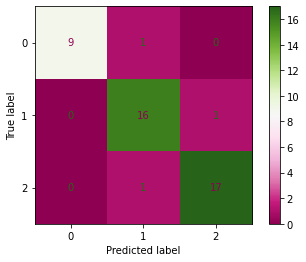

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#혼돈행렬
cm= confusion_matrix(y_test_argmax, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='PiYG')


## 과제
---

### | 과제1. 이진분류 문제 정리

* 예측값의 범위 : 0~1
* 예측값의 shape  :(샘플수 ,클래스개수)
* 아웃풋 레이어의 노드 개수 : 클래스 개수
* 아웃풋 레이어의 activation :  softmax
* 손실함수 (loss) : categorical_crossentropy
* 평가함수 (metrics) :  accuracy

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
(105, 4) (45, 4) (105, 3) (45, 3)
첫번째 샘플 x: [ 2.24968346 -1.05056946  1.78634131  1.44795564]
첫번째 샘플 y: [0. 0. 1.]
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_12 (Dense)            (None, 12)                60        
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Ep

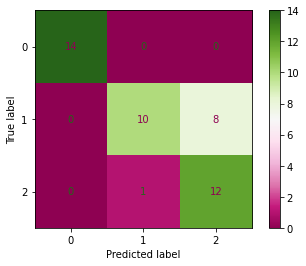

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기 및 전처리
path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
dataset = pd.read_csv(path, header=None)


from sklearn.preprocessing import StandardScaler, OneHotEncoder #머신러닝 라이브러리
from sklearn.model_selection import train_test_split

def path2dataset_iris(path):

  # 불러오기
  dataset =  pd.read_csv(path,  # 엑셀이나 csv 등 정현 데이터를 불러오기
                       header=None, # 첫번째 샘플이 헤더로 읽히지 않도록 설정
                       
                       ) 
  #print(dataset.shape)  #데이터형식 : 판다스의 데이터프레임

  dataset = dataset.values # 데이터 형식 : 넘파이 배열로 변환
  # x-y 분할 -> 넘파이 배열을 슬라이싱하는 기법
  x = dataset[:, 0:-1] # ( : 모든행, 첫번째부터 마지막 전까지의 열)
  y = dataset[:, -1] # ( : 모든행, 마지막열)
  #print(x.shape, y.shape)


# 정규화(속셩별로 데이터의 스케일을 조정)- x데이터만 해준다
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  #print(dataset.shape, dataset.dtype) # 데이터형식 : 넘파이 배열

# 원핫 인코딩: y{[1,0,0], [0,1,0], [0,0,1]}
  onehot = OneHotEncoder(sparse = False)
  y = onehot.fit_transform(np.expand_dims(y,1)) # y(샘플개수, ) 행렬(샘플개수 ,1)
  print(onehot.categories_)
 
  # train-test 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.3)
  
  return x_train, x_test, y_train, y_test

path = '/content/SkillTreePython-DeepLearning/dataset/iris.csv'
x_train, x_test, y_train, y_test = path2dataset_iris(path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(f'첫번째 샘플 x: {x_train[0]}')
print(f'첫번째 샘플 y: {y_train[0]}')



#모델 생성
from tensorflow.keras import models, layers, utils

#60-> 30->1
def bulid_model():
  x = layers.Input(shape=(4))
  y = layers.Dense(12, activation= 'relu')(x)
  y = layers.Dense(8, activation= 'relu')(y)
  y = layers.Dense(3, activation = 'softmax')(y)   #회귀 문제 경우, 마지막 레이어의 activation을 사용하지 않는다.
  model = models.Model(x,y)


  return model

#모델 시각화
model =bulid_model()
model.summary()

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy']) 


#모델 학습
model.fit(x_train, y_train, epochs=50, batch_size=10)


#모델 예측
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)

y_test_argmax = np.argmax(y_test, axis=1) #세개 클래스 중 가장 큰 값 인덱스
y_pred_argmax =np.argmax(y_pred, axis=1)

#for i in range(10):
  #print('y true:' {y_test[i]}- {y_test_argmax[i]}, 'y_pred', {y_pred_argmax[i]})
 
#예측시각화
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#혼돈행렬
cm= confusion_matrix(y_test_argmax, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='PiYG')


### | 과제 3. MNIST 숫자 데이터 분류

```
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

In [68]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#정규화 (x에 대해서만 정규화) 이미지 데이터 : 0~255-> 0~1

x_train = x_train / 255 
x_test = x_test / 255

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* 데이터 시각화

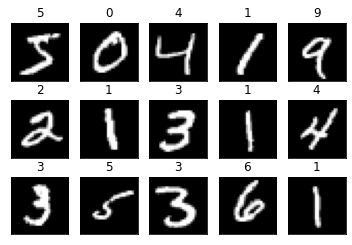

In [69]:
for i in range(15):
  img = x_train[i]
  label = y_train[i]
  plt.subplot(3,5, i+1)
  plt.imshow(img, cmap = 'gray')
  plt.title(label)
  plt.xticks([]); plt.yticks([])

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0105-03.PNG?raw=true width=500>
</p>


#### **모델 생성**

In [97]:
from tensorflow.keras import models, layers, utils

#4
def bulid_model():
  x = layers.Input(shape=(28,28))
  y= layers.Flatten()(x)

  y = layers.Dense(1001, activation = 'relu')(y)
  #중간층
  y = layers.Dense(10, activation = 'softmax')(y)   #마지막 레이어의 softmax 사용.
  model = models.Model(x,y)


  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

In [98]:
model =bulid_model()
model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 1001)              785785    
                                                                 
 dense_25 (Dense)            (None, 10)                10020     
                                                                 
Total params: 795,805
Trainable params: 795,805
Non-trainable params: 0
_________________________________________________________________


### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer, metrics) 
```
* `loss` : 
  * sparse_categorical_crossentropy : 원핫인코딩을 안했을 때 사용 가능
* `optimizer` :adam 
* `metrics`: accuracy


In [99]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [100]:
model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1775 - accuracy: 0.9466
Epoch 2/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0742 - accuracy: 0.9765
Epoch 3/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 4/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 5/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 6/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0261 - accuracy: 0.9918
Epoch 7/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 8/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0208 - accuracy: 0.9939
Epoch 9/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 10/10
3750/3750 [==============================] - 8s 2ms/step - loss: 0.014

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [101]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9809


[0.1097746342420578, 0.98089998960495]

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [102]:
y_pred = model.predict(x_test)
print(y_test.shape, y_pred.shape)


y_pred_argmax =np.argmax(y_pred, axis=1)

#for i in range(10):
  #print('y true:' {y_test[i]}- {y_test_argmax[i]}, 'y_pred', {y_pred_argmax[i]})
 

(10000,) (10000, 10)


* 예측 시각화

[[ 971    1    2    1    1    1    1    1    1    0]
 [   0 1130    1    2    0    0    0    0    2    0]
 [   0    1 1012    4    1    0    0    7    6    1]
 [   0    0    2  986    0    6    0    3    5    8]
 [   0    0    3    0  970    0    0    1    1    7]
 [   1    0    0    6    1  879    2    1    1    1]
 [   2    3    1    1    6   20  919    0    6    0]
 [   1    4    7    0    3    0    0 1000    2   11]
 [   0    1    2    4    3    4    0    2  951    7]
 [   2    2    0    1   11    2    0    0    0  991]]


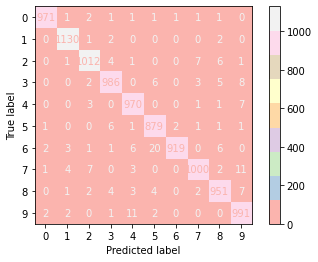

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#혼돈행렬
cm= confusion_matrix(y_test, y_pred_argmax)
print(cm)
ConfusionMatrixDisplay(cm).plot(cmap='Pastel1')


* 모델 활용

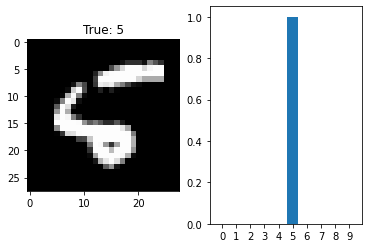

In [114]:
idx =8 #n번째 샘플
img = x_test[idx]
label = y_test[idx]
pred = y_pred_argmax[idx]
pred = y_pred[idx]
pred_argmax = y_pred_argmax[idx]

plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title(f'True: {label}')
plt.subplot(122); plt.bar(range(10), pred); plt.xticks(range(10))
plt.show()
